In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [595]:
events = pd.read_csv('../resources/trajectories-0400pm-0415pm_editted.csv')

In [3]:
events.head()

,Vehicle_ID,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
0,2,29,1707,1163033200,8.695,235.155,2230541.536,1375765.856,14.0,7.0,...,102,214,1,0,2,3,0,0,0.0,0.0
1,2,30,1707,1163033300,7.957,236.573,2230541.013,1375767.607,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0
2,2,31,1707,1163033400,7.335,238.296,2230540.384,1375769.177,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0
3,2,32,1707,1163033500,6.855,240.238,2230540.053,1375771.229,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0
4,2,33,1707,1163033600,6.543,242.413,2230539.947,1375773.631,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0


In [4]:
events.shape

(457997, 24)

In [5]:
print("Number of Cars")
events.Vehicle_ID.drop_duplicates().shape[0]

Number of Cars


753

In [6]:
min_time = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(events.Epoch_ms.min()))
print("Start Time:", min_time)

Start Time: 11/08/2006 19:06:40


In [7]:
max_time = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(events.Epoch_ms.max()))
print("End Time:", max_time)

End Time: 11/20/2006 17:53:20


In [9]:
carsOnTheRoad = dict()
min_epoch = events.Epoch_ms.min()
max_epoch = events.Epoch_ms.max()
for timeincr in range(min_epoch, max_epoch, 4000):
    carsOnTheRoad[timeincr] = 0
    records = events[(events.Epoch_ms >= timeincr) & (events.Epoch_ms <= (timeincr+4000)) ]
    carsOnTheRoad[timeincr] = records.Vehicle_ID.drop_duplicates().shape[0]


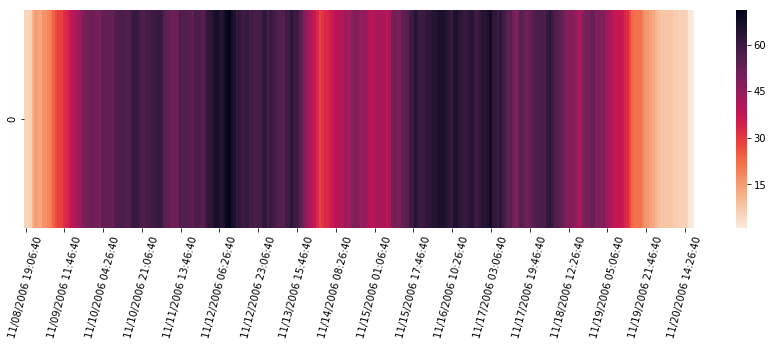

In [10]:
df = pd.DataFrame.from_dict(carsOnTheRoad, orient='index')
df.index = pd.Series({x: time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(x)) for x in df.index})
import seaborn as sns
plt.figure(figsize=(15, 4))
plt.xticks(rotation=75)
sns.heatmap(df.transpose(), xticklabels = 15, cmap= sns.cm.rocket_r);


<BarContainer object of 259 artists>

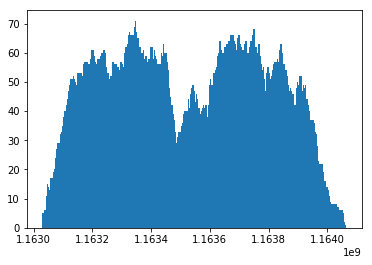

In [11]:
plt.bar(list(carsOnTheRoad.keys()), list(carsOnTheRoad.values()),width=5000 )


In [161]:
events_halfhour = events[(events.Epoch_ms >= 1163412400) & (events.Epoch_ms <= 1163426800) ]

In [404]:
tmp = events.groupby('Vehicle_ID').first()
tmp[tmp.Direction==2].shape

(325, 23)

In [403]:
#753 cars
#428 going south, 325 going north

In [406]:
tmp.to_csv("first_events.csv")

In [469]:
first_events = events.groupby('Vehicle_ID').first().reset_index()

In [472]:
first_events.sort_values('Epoch_ms', inplace=True)

In [545]:
first_events.shape

(753, 25)

In [491]:
first_events['inter-arrival'] = first_events['Epoch_ms'].diff().dropna()/1000

In [532]:
avg = first_events[(first_events.Section == 2) | (first_events.Intersection ==1)]['inter-arrival'].mean()

In [533]:
avg

0.9813333333333333

### Test Train Split

In [578]:
def isInSystem(entry):
    if (entry.Section + entry.Intersection)<=1 or (entry.Section + entry.Intersection)== 6 or entry.Intersection==5 or entry.Direction==4:
        return False
    else:
        return True

In [596]:
events = events[events.Direction==2]
#events = events[events.apply(lambda x: isInSystem(x), axis=1)]

In [597]:
events.sort_values('Epoch_ms', inplace=True)


In [598]:
train = events.iloc[:int(events.shape[0]*0.75)]
test = events.iloc[int(events.shape[0]*0.75):]

In [599]:
def findDist(df, section, intersection):
    return df[(df.Section == section) | (df.Intersection ==intersection)][['Epoch_ms']].sort_values('Epoch_ms').diff().dropna().mean()/1000
    

In [600]:
train_events = train.groupby('Vehicle_ID').first().reset_index()

In [606]:
#print("Section 1: ", findDist(train_events, 1, 7))
print("Section 2: ", findDist(train_events, 2, 1))
print("Section 3: ", findDist(train_events, 3, 2))
print("Section 4: ", findDist(train_events, 4, 3))
print("Section 5: ", findDist(train_events, 5, 4))


Section 1:  Epoch_ms    5.722047
dtype: float64
Section 2:  Epoch_ms    15.621739
dtype: float64
Section 3:  Epoch_ms    64.35
dtype: float64
Section 4:  Epoch_ms    42.673333
dtype: float64
Section 5:  Epoch_ms    68.066667
dtype: float64


In [667]:
train_events[(train_events.Section == 1) | (train_events.Section == 2) | (train_events.Intersection ==1) ][['Epoch_ms']].sort_values('Epoch_ms').diff().dropna().mean()/1000




    

Epoch_ms    4.185632
dtype: float64

In [646]:
print("Section 1: ", findDist(train_events, 1, 1))
print("Section 2: ", findDist(train_events, 2, 2))
print("Section 3: ", findDist(train_events, 3, 3))
print("Section 4: ", findDist(train_events, 4, 4))
print("Section 5: ", findDist(train_events, 5, 5))


Section 1:  Epoch_ms    4.309467
dtype: float64
Section 2:  Epoch_ms    46.253846
dtype: float64
Section 3:  Epoch_ms    94.657143
dtype: float64
Section 4:  Epoch_ms    58.8
dtype: float64
Section 5:  Epoch_ms    9.995775
dtype: float64


In [607]:
test_events = test.groupby('Vehicle_ID').first().reset_index()
print("Section 2: ", findDist(test_events, 2, 1))
print("Section 3: ", findDist(test_events, 3, 2))
print("Section 4: ", findDist(test_events, 4, 3))
print("Section 5: ", findDist(test_events, 5, 4))


Section 2:  Epoch_ms    7.204348
dtype: float64
Section 3:  Epoch_ms    37.66
dtype: float64
Section 4:  Epoch_ms    19.8
dtype: float64
Section 5:  Epoch_ms    5.377778
dtype: float64


In [678]:
f = events.groupby('Vehicle_ID').first()
l = events.groupby('Vehicle_ID').last()

In [679]:
f = f[(f.Intersection == 1) | (f.Section == 1) | (f.Section == 2)]

In [680]:
l = l[(l.Intersection == 5) | (l.Section == 6) | (l.Section == 5)]

In [681]:
l.head()

,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,Veh_Class,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
Vehicle_ID,,,,,,,,,,,,,,,,,,,,,
2,1708,1707,1163201100,18.005,2080.727,2230806.067,1377541.783,14.0,7.0,2,...,102,214,5,0,2,1,0,85,0.0,0.0
15,1757,1713,1163206000,8.227,2076.264,2230797.087,1377535.876,18.0,7.0,2,...,101,214,5,0,2,1,0,59,0.0,0.0
17,1776,1717,1163207900,7.312,2078.503,2230795.841,1377537.949,15.5,7.0,2,...,101,214,5,0,2,1,0,50,0.0,0.0
22,146,27,1163044900,7.067,2073.188,2230796.412,1377532.659,15.4,7.1,2,...,115,214,5,0,2,2,0,13,0.0,0.0
27,172,21,1163047500,7.973,2086.456,2230794.837,1377546.923,14.9,6.8,2,...,115,214,0,6,2,1,0,13,0.0,0.0


In [682]:
f.head()

,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,Veh_Class,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
Vehicle_ID,,,,,,,,,,,,,,,,,,,,,
2,29,1707,1163033200,8.695,235.155,2230541.536,1375765.856,14.0,7.0,2,...,102,214,1,0,2,3,0,0,0.00,0.00
13,43,597,1163034600,12.338,231.948,2230544.437,1375762.413,14.5,7.0,2,...,102,203,1,0,2,3,0,0,0.00,0.00
15,45,1713,1163034800,11.939,33.508,2230519.322,1375566.277,18.0,7.0,2,...,101,214,0,1,2,1,2,0,233.92,13.53
17,60,1717,1163036300,13.185,18.734,2230519.819,1375553.248,15.5,7.0,2,...,101,214,0,1,2,1,15,0,37.12,1.44
21,88,209,1163039100,23.705,27.501,2230530.563,1375559.337,18.0,7.0,2,...,101,202,0,1,2,1,0,0,0.00,0.00


In [683]:
travel_time = (l['Epoch_ms'] - f['Epoch_ms']).dropna()

In [684]:
travel_time.count()

118

In [685]:
travel_time.max()/1000

237.6

In [686]:
travel_time.min()/1000


67.9

In [687]:
travel_time.mean()/1000

135.62881355932203

In [650]:
train.Epoch_ms.max()/1000 - train.Epoch_ms.min()/1000

728.6999999999534

In [663]:
train.Vehicle_Acc.describe()

count    153002.000000
mean         -0.046938
std           4.595837
min         -12.270000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.270000
Name: Vehicle_Acc, dtype: float64

In [693]:
first_events = events.groupby('Vehicle_ID').first()

In [698]:
first_events[(first_events.Intersection==1) | (first_events.Section==1)]

,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,Veh_Class,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
Vehicle_ID,,,,,,,,,,,,,,,,,,,,,
2,29,1707,1163033200,8.695,235.155,2230541.536,1375765.856,14.0,7.0,2,...,102,214,1,0,2,3,0,0,0.00,0.00
13,43,597,1163034600,12.338,231.948,2230544.437,1375762.413,14.5,7.0,2,...,102,203,1,0,2,3,0,0,0.00,0.00
15,45,1713,1163034800,11.939,33.508,2230519.322,1375566.277,18.0,7.0,2,...,101,214,0,1,2,1,2,0,233.92,13.53
17,60,1717,1163036300,13.185,18.734,2230519.819,1375553.248,15.5,7.0,2,...,101,214,0,1,2,1,15,0,37.12,1.44
21,88,209,1163039100,23.705,27.501,2230530.563,1375559.337,18.0,7.0,2,...,101,202,0,1,2,1,0,0,0.00,0.00
24,145,206,1163044800,24.406,34.537,2230531.832,1375566.293,18.0,7.0,2,...,101,202,0,1,2,1,21,0,75.90,4.79
36,202,1395,1163050500,23.022,16.547,2230529.763,1375551.612,16.6,7.0,2,...,101,215,0,1,2,1,24,0,75.71,2.53
39,202,1598,1163050500,12.001,16.837,2230518.743,1375551.288,15.0,7.0,2,...,101,214,0,1,2,1,17,0,23.75,19.96
50,290,1573,1163059300,13.683,18.687,2230520.319,1375553.229,16.5,7.0,2,...,101,214,0,1,2,1,39,0,49.91,4.44


## Car Arrival Analysis

In [445]:
event2 = events[events.Direction!=4]

In [452]:
event2.shape

(204003, 24)

In [447]:
inSystemEvents = event2[event2.apply(lambda x: isInSystem(x), axis=1)]

In [449]:
removed = event2[((event2.Section + event2.Intersection)<=1) | ((event2.Section + event2.Intersection)== 6) | 
       (event2.Intersection==5) ]



In [450]:
removed.head()

,Vehicle_ID,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
0,2,29,1707,1163033200,8.695,235.155,2230541.536,1375765.856,14.0,7.0,...,102,214,1,0,2,3,0,0,0.0,0.0
1629,2,1658,1707,1163196100,26.760,1969.251,2230831.683,1377432.360,14.0,7.0,...,102,214,5,0,2,1,0,0,0.0,0.0
1630,2,1659,1707,1163196200,26.665,1970.030,2230831.488,1377433.131,14.0,7.0,...,102,214,5,0,2,1,0,0,0.0,0.0
1631,2,1660,1707,1163196300,26.534,1971.031,2230831.200,1377434.165,14.0,7.0,...,102,214,5,0,2,1,0,0,0.0,0.0
1632,2,1661,1707,1163196400,26.387,1972.233,2230830.860,1377435.507,14.0,7.0,...,102,214,5,0,2,1,0,0,0.0,0.0


In [345]:
events.shape

(457997, 24)

In [451]:
removed.shape

(36059, 24)

In [426]:
inSystemEvents.shape

(167944, 24)

In [457]:
len(set(removed.Vehicle_ID.unique()) - set(inSystemEvents.Vehicle_ID.unique()))

134

In [347]:
len(inSystemEvents.Vehicle_ID.unique())

##Initially system has : 753 unique vehicles
## When no direction constraint : 467 unique vehicles
## When direction !=4 applied : 191 unique vehicles

191

In [466]:
exitData = events.groupby('Vehicle_ID').last().reset_index()[[ 'Vehicle_ID', 'Section', 'Intersection', 'Movement', 'Direction']]



In [468]:
exitData[exitData.Section + exitData.Intersection ==2]

,Vehicle_ID,Section,Intersection,Movement,Direction
4,13,2,0,1,2
46,115,0,2,2,2
66,166,0,2,2,2
67,169,0,2,1,2
70,176,0,2,1,2
80,197,0,2,1,2
88,222,0,2,2,2
115,265,0,2,3,2
118,268,0,2,1,4
126,284,0,2,3,4


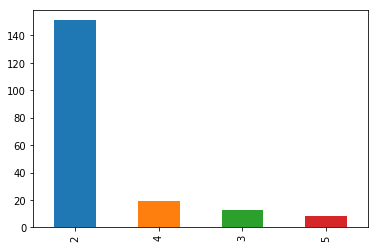

In [276]:
first_events = inSystemEvents.groupby('Vehicle_ID').first().reset_index()
first_events = first_events[first_events.Direction==2]
(first_events.Intersection + first_events.Section).value_counts().plot.bar()
filtered_events = inSystemEvents[inSystemEvents.Vehicle_ID.isin(first_events.Vehicle_ID)]

In [284]:
first_events['date_time'] = first_events.apply(lambda x: time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(x.Epoch_ms)), axis=1)


In [289]:
first_events['date_time'] = pd.to_datetime(first_events.date_time)


[]

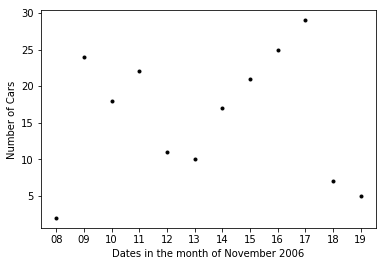

In [330]:
## Day Distribution
day_dist = first_events.date_time.dt.strftime('%d').value_counts().sort_index()
ax = day_dist.plot(style='k.')
ax.set_xticks(range(len(day_dist)))
ax.set_xticklabels(day_dist.index.tolist())
ax.set_xlabel("Dates in the month of November 2006")
ax.set_ylabel("Number of Cars")
ax.plot()

[]

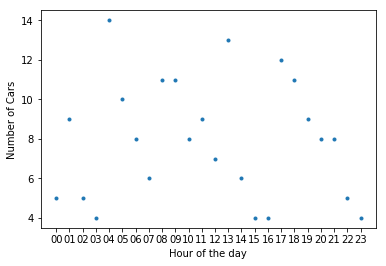

In [352]:
## Hour Distribution
hour_dist = first_events.date_time.dt.strftime('%H').value_counts().sort_index()
ax = hour_dist.plot(style='.')
ax.set_xticks(range(len(hour_dist)))
ax.set_xticklabels(hour_dist.index.tolist())
ax.set_xlabel("Hour of the day")
ax.set_ylabel("Number of Cars")
ax.plot()


### Test for independence

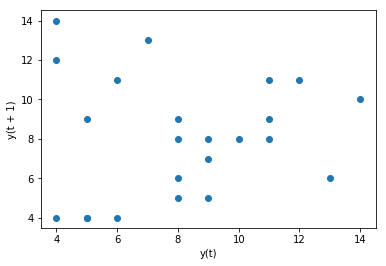

In [359]:

from pandas.plotting import lag_plot
ax = lag_plot(hour_dist)
plt.show()

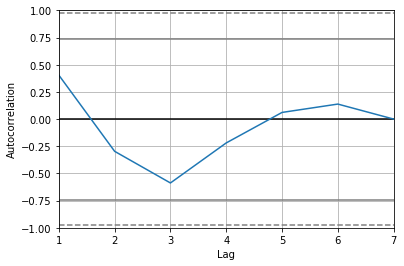

In [370]:
from pandas.plotting import autocorrelation_plot
dayOfWeek_dist = first_events.date_time.dt.dayofweek.value_counts().sort_index()
autocorrelation_plot(dayOfWeek_dist)
plt.show()

#### Test for Stationarity

In [372]:
first_events['day'] = first_events.date_time.dt.strftime('%d')
first_events['hour'] = first_events.date_time.dt.strftime('%H')

In [379]:
arrival_hourly = first_events.groupby(['day','hour'])

In [397]:
arrival_hourly.size()

day  hour
08   19      1
     20      1
09   04      2
     05      3
     06      2
     07      3
     10      2
     11      1
     12      1
     13      1
     14      1
     17      1
     18      1
     19      3
     20      2
     22      1
10   01      1
     04      1
     05      2
     06      2
     08      1
     09      1
     10      1
     11      3
     12      2
     13      1
     14      1
     17      1
     18      1
11   02      1
            ..
16   14      1
     18      1
     19      1
     22      1
     23      1
17   03      1
     04      2
     05      3
     06      2
     07      2
     08      3
     09      1
     10      2
     15      2
     16      2
     17      2
     18      1
     20      2
     21      2
     22      1
     23      1
18   02      1
     08      2
     09      2
     19      2
19   01      1
     02      1
     04      1
     10      1
     11      1
Length: 121, dtype: int64

In [392]:
first_events.sort_values('Epoch_ms').hour.astype('int').diff()

0       NaN
1       1.0
2     -16.0
3       0.0
5       1.0
4       0.0
7       0.0
6       1.0
8       0.0
9       1.0
11      0.0
10      0.0
13      3.0
14      0.0
16      1.0
17      1.0
19      1.0
18      1.0
20      3.0
21      1.0
23      1.0
22      0.0
25      0.0
24      1.0
26      0.0
27      2.0
28    -21.0
29      3.0
31      1.0
15      0.0
       ... 
160     0.0
159     0.0
161     1.0
162     1.0
163     0.0
165     5.0
166     0.0
164     1.0
167     0.0
168     1.0
169     0.0
170     1.0
172     2.0
171     0.0
173     1.0
174     0.0
175     1.0
176     1.0
177   -21.0
178     6.0
179     0.0
181     1.0
182     0.0
183    10.0
184     0.0
187   -18.0
186     1.0
188     2.0
180     6.0
185     1.0
Name: hour, Length: 191, dtype: float64

In [277]:
len(filtered_events.groupby('Vehicle_ID')['Vehicle_ID'].count())

191

In [278]:
last_events = filtered_events.groupby('Vehicle_ID').last().reset_index()

In [279]:
(last_events.Section + last_events.Intersection).value_counts()

5    154
2     18
3     10
4      9
dtype: int64

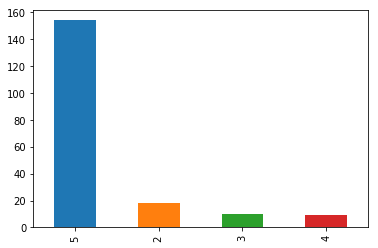

In [280]:
(last_events.Section + last_events.Intersection).value_counts().plot.bar()

In [241]:
car_remove

(276, 24)

In [181]:
filtered_events = filtered_events[~filtered_events.Vehicle_ID.isin(car_remove)]

In [182]:
len(filtered_events.Vehicle_ID.unique())

152

In [169]:
## Exit section analysis

In [128]:
exit_section = filtered_events.groupby(['Vehicle_ID']).last().reset_index()[['Vehicle_ID', 'Section', 'Intersection', 'Direction', 'Movement']]



In [129]:
exit_section.Movement.value_counts()

1    119
2     25
3      8
Name: Movement, dtype: int64

In [83]:
exit_section['exit'] = exit_section['Section'] + exit_section['Intersection']

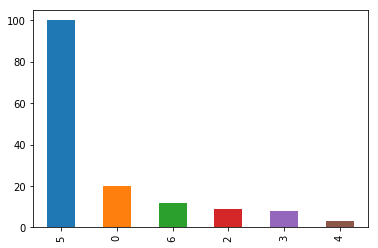

In [88]:
exit_section.exit.value_counts().plot.bar()

In [89]:
exit_section[exit_section.exit == 0]

,Vehicle_ID,Section,Intersection,exit
4,21,0,0,0
5,24,0,0,0
26,224,0,0,0
35,259,0,0,0
39,271,0,0,0
42,335,0,0,0
46,360,0,0,0
53,381,0,0,0
60,451,0,0,0
61,489,0,0,0


In [132]:
u = np.random.rand(5,3)
print(u)
u[:2]

[[0.94337307 0.4128203  0.01890367]
 [0.91815477 0.41479426 0.89730632]
 [0.54538792 0.33244804 0.83856544]
 [0.85233107 0.47937343 0.06963366]
 [0.30844172 0.09612131 0.94867782]]


array([[0.94337307, 0.4128203 , 0.01890367],
       [0.91815477, 0.41479426, 0.89730632]])

In [155]:
nnz = (u > 0.5).sum()

In [157]:
nnz

7

In [160]:
u[:,:10]

array([[0.94337307, 0.4128203 , 0.01890367],
       [0.91815477, 0.41479426, 0.89730632],
       [0.54538792, 0.33244804, 0.83856544],
       [0.85233107, 0.47937343, 0.06963366],
       [0.30844172, 0.09612131, 0.94867782]])

In [133]:
import fbpca
def _svd(M, rank): return fbpca.pca(M, k=min(rank, np.min(M.shape)), raw=True)

In [134]:
_svd(u, 4)

(array([[-0.37940528, -0.57814756,  0.48042792],
        [-0.60784563,  0.11929478,  0.2352599 ],
        [-0.45695706,  0.28608194, -0.61916491],
        [-0.37382847, -0.50991428, -0.45824182],
        [-0.37150752,  0.55646985,  0.34711819]]),
 array([2.20994201, 1.03062165, 0.10756386]),
 array([[-0.72329952, -0.35095255, -0.5947017 ],
        [-0.52670094, -0.27656281,  0.80380292],
        [ 0.44656906, -0.89462021, -0.01519071]]))

In [149]:
_svd(u, 4)[1]

array([2.20994201, 1.03062165, 0.10756386])

In [152]:
np.linalg.svd(u)

(array([[-0.37940528, -0.57814756,  0.48042792, -0.52858714,  0.10761818],
        [-0.60784563,  0.11929478,  0.2352599 ,  0.38938264, -0.63978619],
        [-0.45695706,  0.28608194, -0.61916491, -0.56474969, -0.08390454],
        [-0.37382847, -0.50991428, -0.45824182,  0.48876561,  0.3890531 ],
        [-0.37150752,  0.55646985,  0.34711819,  0.1055593 ,  0.64860594]]),
 array([2.20994201, 1.03062165, 0.10756386]),
 array([[-0.72329952, -0.35095255, -0.5947017 ],
        [-0.52670094, -0.27656281,  0.80380292],
        [ 0.44656906, -0.89462021, -0.01519071]]))

In [139]:

np.sign(-u) * np.where(u>0.5, u, 0)

array([[-0.94337307, -0.        , -0.        ],
       [-0.91815477, -0.        , -0.89730632],
       [-0.54538792, -0.        , -0.83856544],
       [-0.85233107, -0.        , -0.        ],
       [-0.        , -0.        , -0.94867782]])

In [137]:
np.sign(u)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [138]:
np.where(u>0.5, u, 0)

array([[0.94337307, 0.        , 0.        ],
       [0.91815477, 0.        , 0.89730632],
       [0.54538792, 0.        , 0.83856544],
       [0.85233107, 0.        , 0.        ],
       [0.        , 0.        , 0.94867782]])

In [145]:
res=[]
res.extend([u[1,:], u[3,:]])

In [146]:
res.extend([u[2,:], u[4,:]])

In [144]:
u[3,:]

array([0.85233107, 0.47937343, 0.06963366])

In [147]:
res

[array([0.91815477, 0.41479426, 0.89730632]),
 array([0.85233107, 0.47937343, 0.06963366]),
 array([0.54538792, 0.33244804, 0.83856544]),
 array([0.30844172, 0.09612131, 0.94867782])]

In [ ]:
np.where(S>0, S, 0)